# Santander Product Recommendation<br>
https://www.kaggle.com/c/santander-product-recommendation

## 탐색적 데이터 분석 및 결측값 정제

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../data/santander/train_ver2.csv')
test = pd.read_csv('../data/santander/test_ver2.csv')

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
train.shape

(13647309, 48)

In [4]:
train.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [5]:
train.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [6]:
test.shape

(929615, 24)

In [7]:
test.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento'],
      dtype='object')

In [8]:
test.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-06-28,15889,F,ES,V,56,1995-01-16,0,256,1,...,N,N,KAT,N,1,28.0,MADRID,1,326124.90,01 - TOP
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,0,34,1,...,N,NaN,KAT,N,1,3.0,ALICANTE,0,NA,02 - PARTICULARES
2,2016-06-28,1170545,N,ES,V,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,15.0,"CORUÑA, A",1,NA,03 - UNIVERSITARIO
3,2016-06-28,1170547,N,ES,H,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,8.0,BARCELONA,0,148402.98,03 - UNIVERSITARIO
4,2016-06-28,1170548,N,ES,H,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,7.0,"BALEARS, ILLES",0,106885.80,03 - UNIVERSITARIO


In [9]:
fields = pd.read_csv('../data/santander/Data Fields.csv')
products = pd.read_csv('../data/santander/products.csv')

In [10]:
fields

,변수명,뜻,범례
0,fecha_dato,데이터 수집일,2015년 1월 ~ 2016년 5월
1,ncodpers,고객 코드,NaN
2,ind_empleado,고용여부,"A(active), B(ex employed), F(filial), N(not em..."
3,pais_residencia,국적,매우 다양함
4,sexo,성별,"V(여성), H(남성)"
5,age,나이,NaN
6,fecha_alta,고객 첫 계약 날짜,NaN
7,ind_nuevo,최근 6개월 신규 고객여부,Y/N
8,antiguedad,은행 거래 누적 기간,NaN
9,indrel,First/Primary 유지여부,Y/N


In [11]:
products

,변수명,상품명
0,ind_ahor_fin_ult1,Saving Account
1,ind_aval_fin_ult1,Guarantees
2,ind_cco_fin_ult1,Current Accounts
3,ind_cder_fin_ult1,Derivada Account
4,ind_cno_fin_ult1,Payroll Account
5,ind_ctju_fin_ult1,Junior Account
6,ind_ctma_fin_ult1,Más particular Account
7,ind_ctop_fin_ult1,particular Account
8,ind_ctpp_fin_ult1,particular Plus Account
9,ind_deco_fin_ult1,Short-term deposits


다음은 변수들을 하나씩 살펴보면서 대략적인 데이터 분포와 결측치, 이상치 유무를 확인한다. 이때 train 데이터에서는 데이터 정제 과정에서 결측치 및 이상치를 제거해도 무방하지만, test 데이터는 함부로 제거하면 안 되므로 결측치와 이상치를 적절히 대체할 방법을 찾아야 한다. 

In [12]:
train_test = pd.concat([train, test], sort = False)
train_test.reset_index(drop = True, inplace = True)

In [13]:
idx_col = list(train_test.columns[:2])
X_col = list(train_test.columns[2:24])
y_col = list(train_test.columns[24:])

In [14]:
#데이터 수집일
train_test['fecha_dato'].value_counts(dropna = False).sort_index()

2015-01-28    625457
2015-02-28    627394
2015-03-28    629209
2015-04-28    630367
2015-05-28    631957
2015-06-28    632110
2015-07-28    829817
2015-08-28    843201
2015-09-28    865440
2015-10-28    892251
2015-11-28    906109
2015-12-28    912021
2016-01-28    916269
2016-02-28    920904
2016-03-28    925076
2016-04-28    928274
2016-05-28    931453
2016-06-28    929615
Name: fecha_dato, dtype: int64

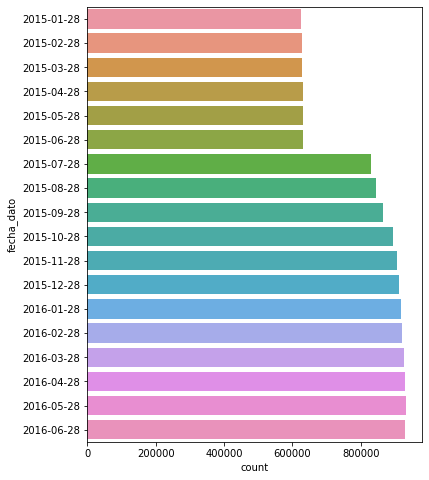

In [15]:
plt.figure(figsize = (6, 8))
sns.countplot(y = train_test['fecha_dato'].sort_values())
plt.show()

데이터 측정기간동안 고객의 수는 일정하지 않고 매달 조금씩 변화했을을 알 수 있다. 특히 2015년 7월을 기점으로 크게 증가한 것을 볼 수 있다. <br/>
또한 날짜 데이터는 숫자 형식으로 간단하게 치환한다. 

In [16]:
import datetime as dt

In [17]:
aa = pd.to_datetime(train_test['fecha_dato'])
train_test['fecha_dato'] = (aa.dt.year - aa.min().year)*12 + (aa.dt.month - aa.min().month)
#날짜 데이터를 숫자형식으로 간단하게 변환

In [18]:
#고객코드
train_test['ncodpers'].value_counts(dropna = False).value_counts(dropna = False).sort_index(ascending=False)

18    604862
17      5851
16      5448
15      5090
14      5291
13      5043
12    190696
11     14795
10     23420
9      28111
8      15963
7       8171
6       9507
5       8142
4       6789
3       5947
2       7325
1       6194
Name: ncodpers, dtype: int64

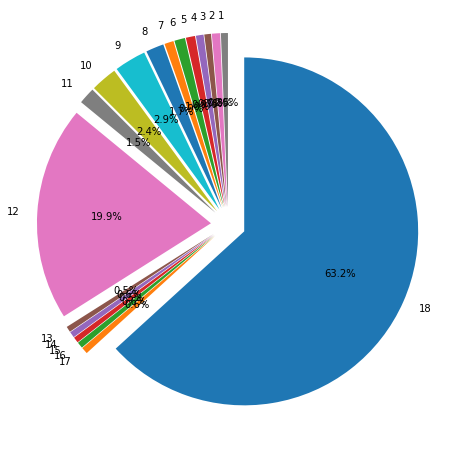

In [19]:
plt.figure(figsize = (8, 8))
ratio = list(train_test['ncodpers'].value_counts(dropna = False).value_counts(dropna = False).sort_index(ascending=False))
labels = train_test['ncodpers'].value_counts(dropna = False).value_counts(dropna = False).sort_index(ascending=False).index
explode = [0.1]*len(ratio)
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode)
plt.show()

고객코드도 마찬가지로 전체 18개월동안 모두 포함된 고객도 있고 1달만 포함된 고객도 있다. 

In [20]:
#고용여부
train_test['ind_empleado'].value_counts(dropna = False)

N      14540073
NaN       27734
B          3784
F          2675
A          2640
S            18
Name: ind_empleado, dtype: int64

In [21]:
#국적
train_test['pais_residencia'].value_counts(dropna = False)

ES     14479329
NaN       27734
FR         5472
AR         5123
DE         4906
         ...   
JM           13
DJ           12
ZW           12
BM            7
MT            3
Name: pais_residencia, Length: 119, dtype: int64

고용여부와 국적은 대부분이 N(무직), ES(스페인)이다. 그런데 데이터가 누락된 값의 개수가 27734개로 같은 것으로 보아 뭔가 공통점이 있는 것으로 보이니 자세히 살펴본다. 

In [22]:
train_test[train_test['ind_empleado'].isnull()]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
261,0,1050741,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1029,0,1051017,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1063,0,1051064,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1154,0,1051387,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1779,0,1048660,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3775976,5,550081,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0
3776175,5,550693,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0
3776230,5,549518,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0
3776279,5,549207,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0


In [23]:
train_test[train_test['ind_empleado'].isnull()].isnull().sum()

fecha_dato                   0
ncodpers                     0
ind_empleado             27734
pais_residencia          27734
sexo                     27734
age                          0
fecha_alta               27734
ind_nuevo                27734
antiguedad                   0
indrel                   27734
ult_fec_cli_1t           27734
indrel_1mes              27734
tiprel_1mes              27734
indresi                  27734
indext                   27734
conyuemp                 27734
canal_entrada            27734
indfall                  27734
tipodom                  27734
cod_prov                 27734
nomprov                  27734
ind_actividad_cliente    27734
renta                    27734
segmento                 27734
ind_ahor_fin_ult1            0
ind_aval_fin_ult1            0
ind_cco_fin_ult1             0
ind_cder_fin_ult1            0
ind_cno_fin_ult1             0
ind_ctju_fin_ult1            0
ind_ctma_fin_ult1            0
ind_ctop_fin_ult1            0
ind_ctpp

위 데이터들은 대부분의 변수들이 누락되어있고 train 데이터에만 포함된 값이므로 삭제한다

In [24]:
train_test = train_test[train_test['ind_empleado'].notnull()]

In [25]:
#성별
train_test['sexo'].value_counts(dropna = False)

V      7928767
H      6620348
NaN         75
Name: sexo, dtype: int64

In [26]:
len(test[test['sexo'].isnull()])

5

성별이 누락된 데이터는 test 데이터에도 포함되어있으므로 함부로 삭제하지 않고 최대한 원형을 살려 보존한다. 

In [27]:
train_test['sexo'].fillna('Unknown', inplace = True)

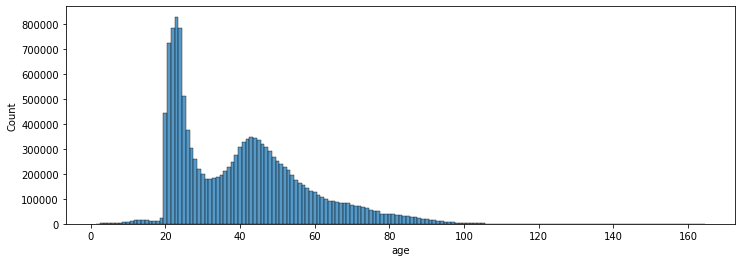

In [28]:
#나이
train_test['age'] = train_test['age'].astype(int)
plt.figure(figsize = (12, 4))
sns.histplot(train_test['age'], discrete=True)
plt.show()

In [29]:
len(test[test['age']>=100])

1237

age 데이터는 100세 이상도 있는 등 이상치가 존재하는 것으로 보이지만 해당 데이터는 test 데이터에도 포함되어 있으므로 함부로 삭제하지 않고 100세로 치환하여 보존한다. 

In [30]:
train_test.loc[train_test['age']>100, 'age'] = 100

In [31]:
#고객 첫 계약 날짜
train_test['fecha_alta'].value_counts(dropna = False)

2014-07-28    60810
2014-10-03    57642
2014-08-04    48533
2013-10-14    43437
2013-08-03    35427
              ...  
2011-04-30       11
2015-05-31        9
2014-05-01        7
2009-12-25        5
2010-07-04        4
Name: fecha_alta, Length: 6756, dtype: int64

fecha_alta 데이터는 날짜가 일단위로 분포해있다. 월단위로 묶어서 숫자로 변환하여 알아보기 쉽게 한다. 

In [32]:
aa = pd.to_datetime(train_test['fecha_alta'])
train_test['fecha_alta'] = (aa.max().year - aa.dt.year)*12 + (aa.max().month - aa.dt.month)
#날짜 데이터를 숫자형식으로 간단하게 변환

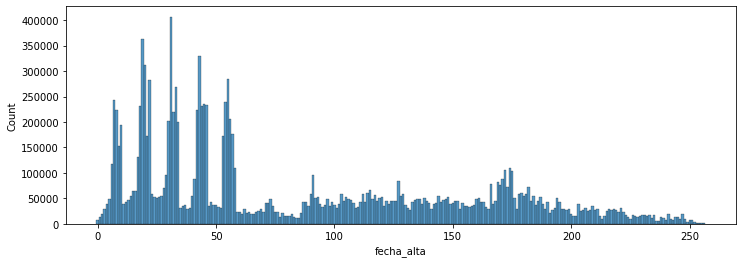

In [33]:
plt.figure(figsize = (12, 4))
sns.histplot(train_test['fecha_alta'], discrete=True)
plt.show()

In [34]:
#최근 6개월 신규 고객여부
train_test['ind_nuevo'].value_counts(dropna = False)

0.0    13712094
1.0      837096
Name: ind_nuevo, dtype: int64

In [35]:
#은행 거래 누적 기간
train_test['antiguedad'] = train_test['antiguedad'].astype(int)
train_test['antiguedad'].value_counts(dropna = False)

 12        246752
 21        232718
 10        216109
 9         200929
 23        193779
            ...  
 254          413
 255          263
 256          179
 257          102
-999999        41
Name: antiguedad, Length: 259, dtype: int64

In [36]:
len(test[test['antiguedad']==-999999])

3

-999999 값은 결측치를 의미한다. 성별과 마찬가지로, test데이터에도 누락된 값이 포함되어 있으므로 삭제하지 않는 방향으로 간다. 

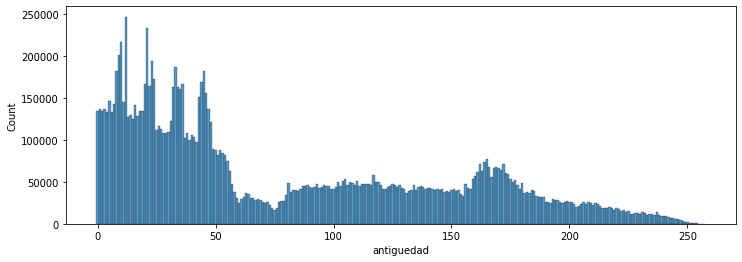

In [37]:
plt.figure(figsize = (12, 4))
sns.histplot(train_test.loc[train_test['antiguedad']>=0, 'antiguedad'], discrete=True)
plt.show()

antiguedad 값이 누락된 데이터는 총 41개이다. <br>
은행 거래 누적 기간이라는 값의 특성상, 첫 계약 날짜를 나타내는 fecha_alta과 관련이 많을 것으로 예상되며,<br>
실제로 분포된 그래프의 모양도 어느 정도 유사성을 보인다. <br>
따라서 같은 날 가입한 다른 고객의 은행 거래 누적 기간을 참조하여 누락된 데이터를 채운다. 

In [38]:
def fillna_mode(ncodpers):
    fecha_alta_na = train_test.loc[train_test['ncodpers']==ncodpers, 'fecha_alta'].unique()[0]
    for i in train_test.loc[(train_test['ncodpers']==ncodpers) & (train_test['antiguedad']==-999999), 'fecha_dato'].unique():
        antiguedad_na = train_test.loc[(train_test['fecha_alta'] == fecha_alta_na) & (train_test['fecha_dato'] == i), 'antiguedad'].value_counts().index[0]
        train_test.loc[(train_test['ncodpers']==ncodpers) & (train_test['fecha_dato'] == i), 'antiguedad'] = antiguedad_na
    return train_test.loc[(train_test['ncodpers'] == ncodpers), 'antiguedad']

In [39]:
for i in train_test.loc[train_test['antiguedad']==-999999, 'ncodpers'].unique():
    fillna_mode(i)

In [40]:
#First/Primary 등급 유지여부
train_test['indrel'].value_counts(dropna = False)

1.0     14522714
99.0       26476
Name: indrel, dtype: int64

In [41]:
#First/Primary 등급 해지된 날짜
train_test['ult_fec_cli_1t'].value_counts(dropna = False)

NaN           14522714
2015-12-24         763
2015-12-28         521
2015-07-09         443
2015-07-06         405
                ...   
2015-08-19          44
2015-08-06          41
2016-06-29          36
2016-01-04          34
2015-12-23          27
Name: ult_fec_cli_1t, Length: 245, dtype: int64

First/Primary 등급이 유지되고 있는 고객의 수와, 해지된 날짜가 누락된 데이터 값의 동일한 것을 확인할 수 있다. <br>
따라서, 여기서 보이는 결측치는 단순한 측정오류가 아니라 해지가 된적이 없기에 입력된 데이터값이 없는 것이라는 점을 유추할 수 있다.<br>
다만 대부분의 값이 의미가 없으므로 해당 칼럼은 삭제해도 무방할 것으로 보인다. 

In [42]:
train_test.drop('ult_fec_cli_1t', axis = 1, inplace = True)

In [43]:
#고객 등급
train_test['indrel_1mes'].value_counts(dropna = False)

1.0    8207172
1.0    4017746
1      2195328
NaN     122070
3.0       1804
3.0       1436
3         1137
P          874
2          483
2.0        479
2.0        355
4.0        143
4.0         93
4           70
Name: indrel_1mes, dtype: int64

입력된 데이터의 형식이 일정하지 않아서 분류가 지저분하게 된 것을 확인할 수 있다. 적절히 정리해주도록 한다. 

In [44]:
a = []
for i in train_test['indrel_1mes']:
    if i in ['1.0', '1', 1]:
        a.append('1')
    elif i in ['2.0', '2', 2]:
        a.append('2')
    elif i in ['3.0', '3', 3]:
        a.append('3')
    elif i in ['4.0', '4', 4]:
        a.append('4')
    elif i == 'P':
        a.append('P')
    else:
        a.append('Unknown')
train_test['indrel_1mes'] = a

In [45]:
#고객 상태
train_test['tiprel_1mes'].value_counts(dropna = False)

I      7840818
A      6580745
NaN     122070
P         4683
R          870
N            4
Name: tiprel_1mes, dtype: int64

In [46]:
train_test['tiprel_1mes'].fillna('Unknown', inplace = True)

In [47]:
#은행이 속한 국가에 거주 여부
train_test['indresi'].value_counts(dropna = False)

S    14479331
N       69859
Name: indresi, dtype: int64

In [48]:
#외국인 여부
train_test['indext'].value_counts(dropna = False)

N    13858387
S      690803
Name: indext, dtype: int64

In [49]:
#직원 배우자 여부
train_test['conyuemp'].value_counts(dropna = False)

NaN    14547278
N          1894
S            18
Name: conyuemp, dtype: int64

In [50]:
test['conyuemp'].value_counts(dropna = False)

NaN    929511
N         103
S           1
Name: conyuemp, dtype: int64

결측치가 대부분이라서 의미가 없는 컬럼으로 보이지만 우선은 test 데이터에서도 모든 항목이 포함되어 있으므로 최대한 원형을 유지해본다. 

In [51]:
train_test['conyuemp'].fillna('Unknown', inplace = True)

In [52]:
#고객 유입 경로
train_test['canal_entrada'].value_counts(dropna = False)

KHE    4306935
KAT    3474042
KFC    3299057
KHQ     666008
KFA     435322
        ...   
KGN         18
KDB         18
KDL         12
025         12
KHR          2
Name: canal_entrada, Length: 163, dtype: int64

In [53]:
len(train_test[train_test['canal_entrada'].isnull()])

160473

고객 유입 경로 데이터는 분류가 163종으로 매우 다양함을 확인할 수 있다. 또한 결측치도 일정량 포함되어 있다. 꽤 중요한 의미를 가질 수 있을 것으로 보이니 최대한 원형을 유지한다. 

In [54]:
train_test['canal_entrada'].fillna('Unknown', inplace = True)

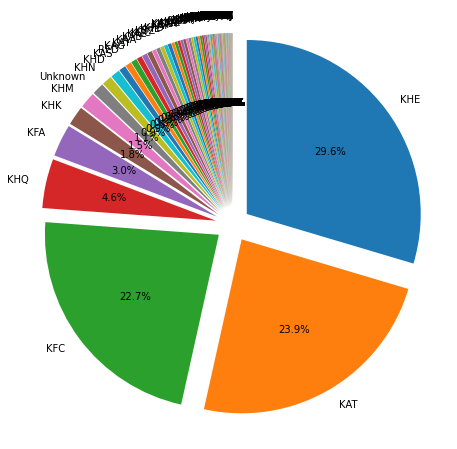

In [55]:
plt.figure(figsize = (8, 8))
ratio = list(train_test['canal_entrada'].value_counts(dropna = False))
labels = train_test['canal_entrada'].value_counts(dropna = False).index
explode = [0.1]*len(list(train_test['canal_entrada'].value_counts(dropna = False)))
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode)
plt.show()

In [56]:
#고객 사망여부
train_test['indfall'].value_counts(dropna = False)

N    14512028
S       37162
Name: indfall, dtype: int64

In [57]:
test['indfall'].value_counts(dropna = False)

N    927215
S      2400
Name: indfall, dtype: int64

고객 사망여부가 S인 경우에는 신규 상품 구매가 일어날 수 없으니 삭제해야 할 것 같지만 일단 test 데이터에도 포함되어 있으니 남겨두도록 한다. 

In [58]:
#주소 타입
train_test['tipodom'].value_counts(dropna = False)

1.0    14549189
NaN           1
Name: tipodom, dtype: int64

In [59]:
train_test[train_test['tipodom'].isnull()]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
7484041,10,41449,N,ES,V,58,214,1.0,0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


모든 값이 1이고 결측된 데이터도 하나뿐이므로 의미가 없는 칼럼이니 삭제한다. 

In [60]:
train_test.drop('tipodom', axis = 1, inplace = True)

In [61]:
#지역 코드
train_test['cod_prov'].value_counts(dropna = False)

28.0    4707850
8.0     1363798
46.0     730300
41.0     645656
15.0     458037
30.0     424511
29.0     391569
50.0     365703
3.0      335544
11.0     314479
36.0     298987
33.0     284049
47.0     254277
35.0     252032
6.0      205932
48.0     198382
45.0     195725
18.0     190954
37.0     175309
39.0     166530
14.0     154510
10.0     138510
7.0      134063
21.0     130301
13.0     127465
2.0      121908
12.0     111440
43.0     107746
9.0      103833
17.0      96842
31.0      94628
26.0      91008
27.0      90618
32.0      89614
24.0      88720
25.0      84489
20.0      76436
38.0      76065
NaN       69853
19.0      69296
23.0      68859
4.0       64598
16.0      61098
49.0      54357
34.0      52593
40.0      45222
22.0      42970
5.0       41411
1.0       40295
44.0      24063
42.0      18921
52.0      10103
51.0       7731
Name: cod_prov, dtype: int64

In [62]:
#지역명
train_test['nomprov'].value_counts(dropna = False)

MADRID                    4707850
BARCELONA                 1363798
VALENCIA                   730300
SEVILLA                    645656
CORUÑA, A                  458037
MURCIA                     424511
MALAGA                     391569
ZARAGOZA                   365703
ALICANTE                   335544
CADIZ                      314479
PONTEVEDRA                 298987
ASTURIAS                   284049
VALLADOLID                 254277
PALMAS, LAS                252032
BADAJOZ                    205932
BIZKAIA                    198382
TOLEDO                     195725
GRANADA                    190954
SALAMANCA                  175309
CANTABRIA                  166530
CORDOBA                    154510
CACERES                    138510
BALEARS, ILLES             134063
HUELVA                     130301
CIUDAD REAL                127465
ALBACETE                   121908
CASTELLON                  111440
TARRAGONA                  107746
BURGOS                     103833
GIRONA        

지역 코드와 지역명은 같은 값을 공유하고 있으므로 지역 코드 컬럼은 삭제한다. 또한 분류가 다양하고 분포가 고르게 되어있는 편이므로 유용한 값으로 생각된다. 

In [63]:
train_test.drop('cod_prov', axis = 1, inplace = True)

In [64]:
train_test['nomprov'].fillna('Unknown', inplace = True)

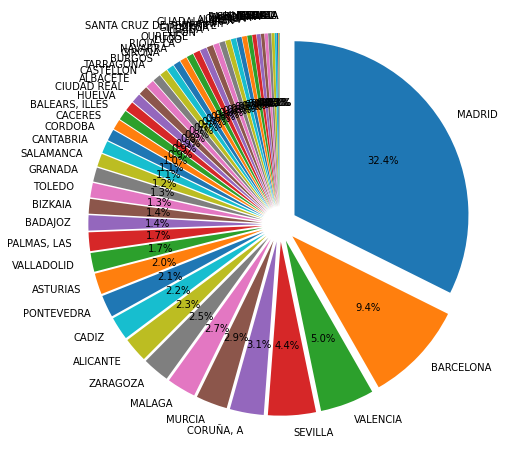

In [65]:
plt.figure(figsize = (8, 8))
ratio = list(train_test['nomprov'].value_counts(dropna = False))
labels = train_test['nomprov'].value_counts(dropna = False).index
explode = [0.1]*len(list(train_test['nomprov'].value_counts(dropna = False)))
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode)
plt.show()

In [66]:
#활동적 고객 여부
train_test['ind_actividad_cliente'].value_counts(dropna = False)

0.0    7918666
1.0    6630524
Name: ind_actividad_cliente, dtype: int64

In [67]:
#가구 총 수입
train_test['renta'].value_counts(dropna = False)

NaN            2766641
         NA     227965
451931.22         5582
463625.16         1743
181042.2          1493
                ...   
   87437.94          1
   56620.53          1
  106367.04          1
  265445.34          1
   59962.56          1
Name: renta, Length: 1037398, dtype: int64

결측치가 두 가지 형태로 존재하는 것을 확인할 수 있다. <br>
결측치의 비율이 전체 데이터의 약 20%에 달할 정도로 꽤 많은 양을 차지하고 있으므로 이를 보완할 방법을 고려해야 한다. 

In [68]:
train_test["renta"]= pd.to_numeric(train_test["renta"], errors="coerce")

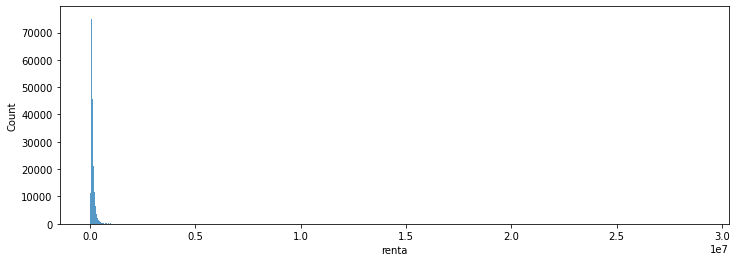

In [69]:
plt.figure(figsize = (12, 4))
sns.histplot(train_test['renta'])
plt.show()

일부 극단적으로 큰 값이 존재하는 것으로 보인다. <br>
전체적인 데이터 분포의 가시성을 높이기 위해 일부 데이터만 잘라서 확인한다. 

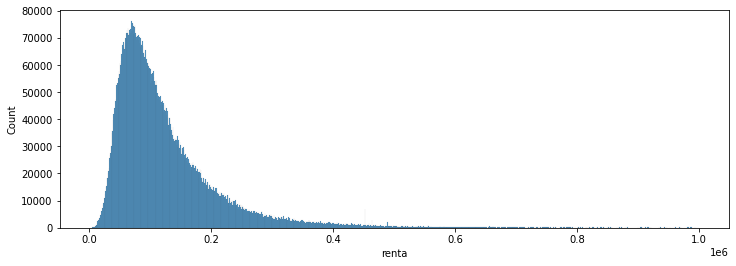

In [70]:
plt.figure(figsize = (12, 4))
sns.histplot(train_test.loc[(train_test['renta']<=1000000), 'renta'])
plt.show()

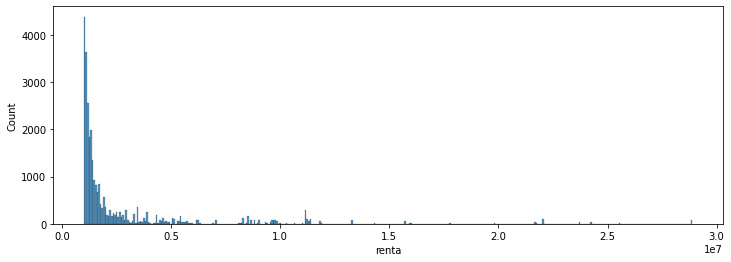

In [71]:
plt.figure(figsize = (12, 4))
sns.histplot(train_test.loc[(train_test['renta']>1000000), 'renta'])
plt.show()

In [72]:
len(train_test.loc[(train_test['renta']>1000000), 'renta'])

28608

대부분의 데이터가 0에서 1000000 사이에 분포하고 있지만 일부 데이터는 매우 큰 값을 가지고 있다. <br>
가구 총 수입이라는 항목의 특성상 매우 큰 값이 나오더라도 정상일 수 있지만, <br>
1000000을 초과하는 데이터의 양은 많지 않은 편이기 때문에 분석의 용이함을 위해서 1000000으로 치환한다. <br>
또한 결측치는 지역별 중앙값으로 채워준다. 

In [73]:
grouped = train_test.groupby("nomprov")["renta"].median()

In [74]:
for i in train_test['nomprov'].unique():
    train_test.loc[train_test['nomprov']==i, 'renta'] = train_test.loc[train_test['nomprov']==i, 'renta'].fillna(grouped[i])

In [75]:
train_test.loc[train_test['renta']>1000000, 'renta'] = 1000000

In [76]:
#고객 분류
train_test['segmento'].value_counts(dropna = False)

02 - PARTICULARES     8505598
03 - UNIVERSITARIO    5281607
01 - TOP               598103
NaN                    163882
Name: segmento, dtype: int64

In [77]:
train_test['segmento'].fillna('Unknown', inplace = True)

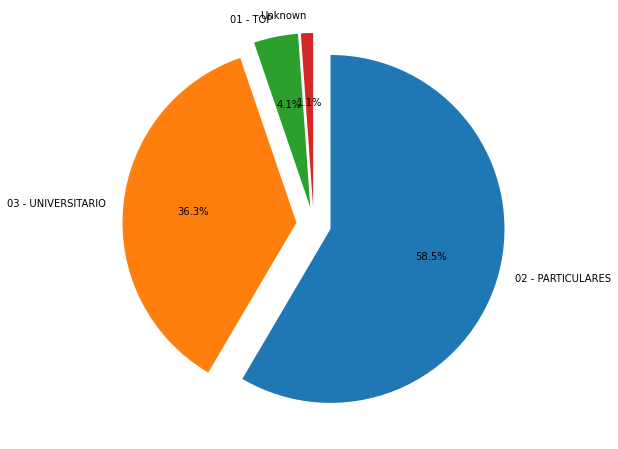

In [78]:
plt.figure(figsize = (8, 8))
ratio = list(train_test['segmento'].value_counts(dropna = False))
labels = train_test['segmento'].value_counts(dropna = False).index
explode = [0.1]*len(list(train_test['segmento'].value_counts(dropna = False)))
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode)
plt.show()

In [79]:
train_test[y_col].isnull().sum()

ind_ahor_fin_ult1    929615
ind_aval_fin_ult1    929615
ind_cco_fin_ult1     929615
ind_cder_fin_ult1    929615
ind_cno_fin_ult1     929615
ind_ctju_fin_ult1    929615
ind_ctma_fin_ult1    929615
ind_ctop_fin_ult1    929615
ind_ctpp_fin_ult1    929615
ind_deco_fin_ult1    929615
ind_deme_fin_ult1    929615
ind_dela_fin_ult1    929615
ind_ecue_fin_ult1    929615
ind_fond_fin_ult1    929615
ind_hip_fin_ult1     929615
ind_plan_fin_ult1    929615
ind_pres_fin_ult1    929615
ind_reca_fin_ult1    929615
ind_tjcr_fin_ult1    929615
ind_valo_fin_ult1    929615
ind_viv_fin_ult1     929615
ind_nomina_ult1      929832
ind_nom_pens_ult1    929832
ind_recibo_ult1      929615
dtype: int64

상품 보유현황 컬럼의 경우 test 데이터에 포함된 값들은 모두 공란이므로 동일한 갯수의 결측치가 있다. <br>
다만 ind_nomina_ult1와 ind_nom_pens_ult1는 train 데이터에도 결측치가 포함되어있어서 갯수가 다름을 확인할 수 있다. <br>
위 결측값은 0으로 채워주도록 한다. 

In [80]:
train_test.loc[train_test['ind_ahor_fin_ult1'].notnull() & train_test['ind_nomina_ult1'].isnull(), 
               ['ind_nomina_ult1', 'ind_nom_pens_ult1']] = 0

In [81]:
train_test.isnull().sum()

fecha_dato                    0
ncodpers                      0
ind_empleado                  0
pais_residencia               0
sexo                          0
age                           0
fecha_alta                    0
ind_nuevo                     0
antiguedad                    0
indrel                        0
indrel_1mes                   0
tiprel_1mes                   0
indresi                       0
indext                        0
conyuemp                      0
canal_entrada                 0
indfall                       0
nomprov                       0
ind_actividad_cliente         0
renta                         0
segmento                      0
ind_ahor_fin_ult1        929615
ind_aval_fin_ult1        929615
ind_cco_fin_ult1         929615
ind_cder_fin_ult1        929615
ind_cno_fin_ult1         929615
ind_ctju_fin_ult1        929615
ind_ctma_fin_ult1        929615
ind_ctop_fin_ult1        929615
ind_ctpp_fin_ult1        929615
ind_deco_fin_ult1        929615
ind_deme

In [82]:
train_test.reset_index(inplace = True, drop = True)

In [83]:
train_test.to_csv('../data/santander/train_test_EDA.csv', index=False)